

---


**Grupo 1:** Ignacio de Lecea, Alejandra Llord, Diego Hermana, Ana Robledano e Ignacio López.

**Grado:** Ingeniería Matemática.

**Asignatura:** Deep Learning.

**Curso:** 4ºB






# PRÁCTICA 1


---
Esta práctica consiste en desarrollador diferentes modelos capaces de reconocer una especio marina representada en una imagen. Para poder construir este tipo de modelos es necesarios utilizar redes convolucionales profundas, las cuales nos permiten extraer las características de las imágenes a través de la información recogida en los píxeles.

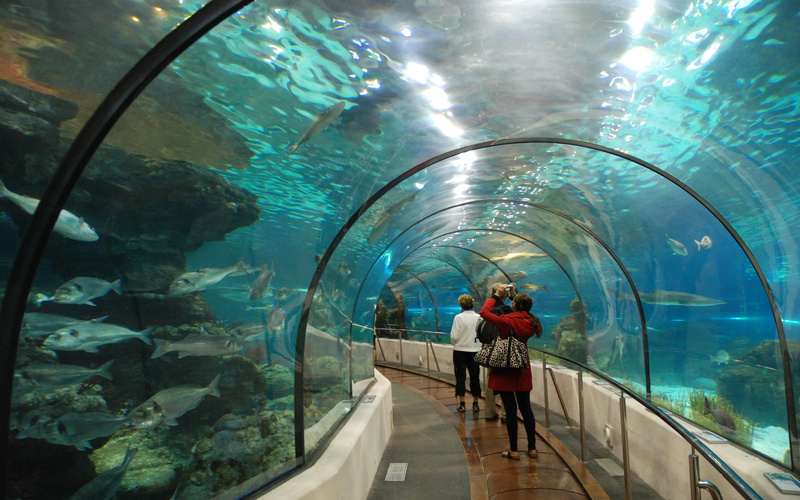

---



##**Fase 1** - Preparación del entorno

Crea un notebook llamado PW1_red_1_n.ipynb (donde n se corresponde con el identificador del grupo) en el servidor de notebooks de tu elección (Colab, Jupyter, etc.).

1. Crea un notebook llamado PW1_red_2_n.ipynb (donde n se corresponde con el identificador del grupo) en el servidor de notebooks de tu elección (Colab, Jupyter, etc.).
Descargar el dataset Download datasetcon las imágenes referentes a los ejemplos.

2. Examina el conjunto de datos para identificar las diferentes clases.

3. Prepara el conjunto de datos para el entrenamiento, transformando/escalando las características y los valores de las clases (si es necesario).

4. Construir un algoritmo que permita agrupar los diferentes ejemplos disponibles en los datasets de entrenamiento, test y validación en clases mediante carpetas. Para poder realizar esta operación se dispone de fichero annotations.csv donde se indica para cada imagen la clase que le corresponde.

**IMPORTANTE: El conjunto de datos de entrenamiento debe ser el mismo para ambos procesos de entrenamiento.**



Importación de librerías al entorno de trabajo:

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Descompresión del dataset y organización de carpetas:

In [ ]:
# Ruta del archivo ZIP y carpeta destino
local_zip = "./practica_1_dataset.zip"
extract_folder = "./dataset"

# Descomprimir el archivo ZIP
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Descompresión completada.")

# Definir rutas de carpetas
train_dir = os.path.join(extract_folder, 'train') # /content/dataset/train
test_dir = os.path.join(extract_folder, 'test')
valid_dir = os.path.join(extract_folder, 'valid')  # Si existe un conjunto de validación

# Verificar existencia de directorios
if os.path.exists(train_dir) and os.path.exists(test_dir):
    print(f"Directorio de entrenamiento encontrado: {train_dir}")
    print(f"Directorio de prueba encontrado: {test_dir}")
    print(f"Directorio de validación encontrado: {valid_dir}")
else:
    raise FileNotFoundError("ERROR: Verifica que el ZIP contiene 'train/' y 'test/' correctamente.")

Descompresión completada.
Directorio de entrenamiento encontrado: ./dataset/train
Directorio de prueba encontrado: ./dataset/test
Directorio de validación encontrado: ./dataset/valid


__Nota__: se debe subir manualmente el dataset en formato zip.

## **Examinación del conjunto de datos:**

Veamos cuántas imágenes hay en cada carpeta.

In [ ]:
folders = ["train", "test", "valid"]
total = 0 # Para contar el número de imágenes totales

# Contar imágenes en cada carpeta
for folder in folders:
    folder_path = os.path.join(extract_folder, folder)
    if os.path.exists(folder_path):
        num_images = len([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
        print(f"📂 {folder}: {num_images} imágenes")
        total = total + num_images
    else:
        print(f"🚨 La carpeta '{folder}' no existe.")

print(f"-------------------------\nTotal de imágenes: {total}")

📂 train: 448 imágenes
📂 test: 63 imágenes
📂 valid: 127 imágenes
-------------------------
Total de imágenes: 638


Cada carpeta (`train`,`test` y `val`) contiene imágenes en formato .jpg y un csv de anotaciones. Por ejemplo:

📂 La carpeta `val` contiene:
* 63 imágenes .jpeg

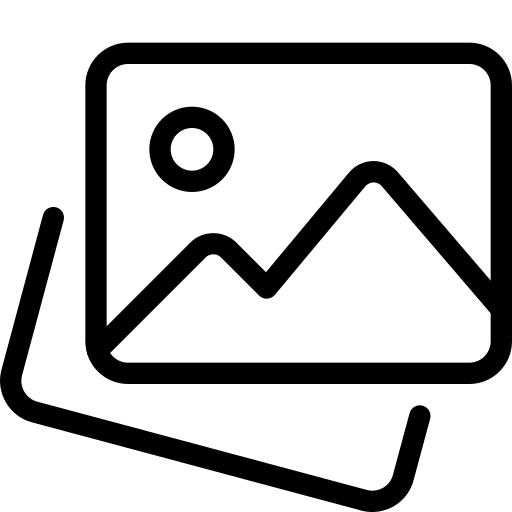

* Y un archivo `annotations.csv`:

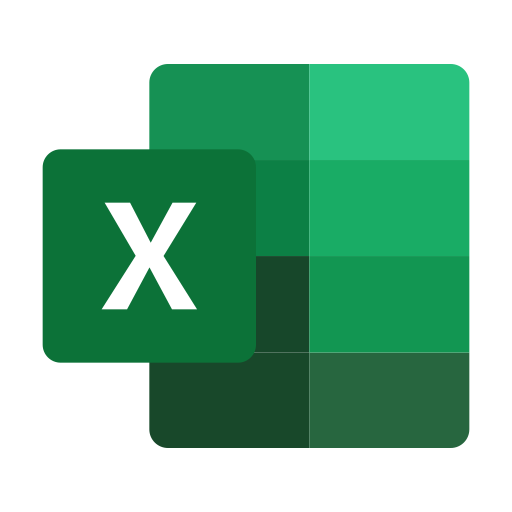

Se recomienda que los datos de validación supongan entre un `5-10%` del número de datos totales. En este caso los datos de validación son aproximadamente el `10%` del total.

A continuación se muestran las distintas clases del dataset y la distribución que siguen (nº de imágenes de cada clase).

In [ ]:
for folder in folders:
  # Cargar el CSV
  csv_path = "/content/dataset/" + folder + "/annotations.csv"
  df = pd.read_csv(csv_path)
  # Contar clases únicas y su frecuencia
  class_counts = df["class"].value_counts()

  # Mostrar resultados
  print(f"📂 {folder}")
  print("--------------------------------------------------------")
  print(class_counts)
  print("--------------------------------------------------------")



📂 train
--------------------------------------------------------
class
fish         1961
jellyfish     385
penguin       330
shark         259
puffin        175
stingray      136
starfish       78
Name: count, dtype: int64
--------------------------------------------------------
📂 test
--------------------------------------------------------
class
fish         249
jellyfish    154
penguin       82
shark         38
puffin        35
stingray      15
starfish      11
Name: count, dtype: int64
--------------------------------------------------------
📂 valid
--------------------------------------------------------
class
fish         459
jellyfish    155
penguin      104
puffin        74
shark         57
stingray      33
starfish      27
Name: count, dtype: int64
--------------------------------------------------------


El `csv` tiene este formato de columnas:

In [ ]:
df.head(2)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...,768,1024,fish,635,54,767,276
1,IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...,768,1024,fish,228,479,538,753


**Nota:** este dataFrame contiene `annotations.csv` de la carpeta 📂`valid`. Mostramos un ejemplo de prueba.

In [ ]:
example_filename = df['filename'][0]
example_class = df['class'][0]

Si queremos imprimir del dataset de validación la primera imagen y su clase utilizamos el PATH: `valid_dir` +  `example_filename` que es el primer registro del `df`.

In [ ]:
example_filename

'IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019fca4b57.jpg'

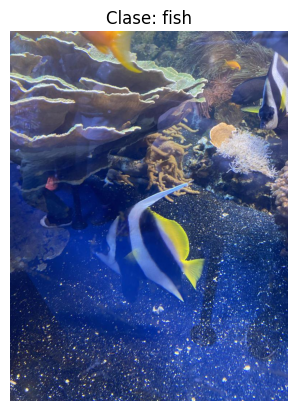

In [ ]:
img_path = valid_dir + '/' + example_filename
img = mpimg.imread(img_path)  # Leer la imagen

# Mostrar la imagen
plt.title(f'Clase: {example_class}')  # Agregar la clase en la leyenda
plt.imshow(img)
plt.axis('off')  # Desactivar ejes
plt.show()


🚨 to do: alguna gráfica con los recuentos por clase

🚨  to do: organizar cada dato debe tener esta estructura:
[`matriz de la imagen`,`one hot encode de la clase`] para eso hay que usar el csv - investigar